# Summary

#### Aim:
The aim of this analysis is to explore and understand how various academic and social factors influence students' performance in Mathematics.

#### Data:
- **Source:** [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/320/student+performance).  
- **Dataset:** student-mat.csv - A record of student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related attributes collected through school reports and questionnaires. The dataset contains 30 features and relates to performance in Mathematics.

#### Method:
Exploratory data analysis (EDA) was conducted. No major data quality issues or missing values were identified. A single sided two-sample z-test with Welch's correction was used to determine if past class failures had an effect in final students' results. 

#### Results and findings:
Results supported the alternative hypothesis that students who have not failed a class tend to achieve higher results in Mathematics.

#### Future improvements or considerations:
This analysis examined the effect of one factor at a time. A more comprehensive approach could explore interactions between multiple factors — such as parents' education level, parental occupation, and residential area — to uncover deeper insights into student performance. Additionally, developing a predictive model using these socioeconomic factors could help forecast student outcomes and support targeted interventions.

## Data dictionary. Columns:
1. school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
2. sex - student's sex (binary: 'F' - female or 'M' - male)
3. age - student's age (numeric: from 15 to 22)
4. address - student's home address type (binary: 'U' - urban or 'R' - rural)
5. famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
6. Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
7. Medu - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)
8. Fedu - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)
9. Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
10. Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
11. reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
12. guardian - student's guardian (nominal: 'mother', 'father' or 'other')
13. traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14. studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15. failures - number of past class failures (numeric: n if 0<=n<2, else 3)
16. schoolsup - extra educational support (binary: yes or no)
17. famsup - family educational support (binary: yes or no)
18. paid - extra paid classes within the course subject (Maths) (binary: yes or no)
19. activities - extra-curricular activities (binary: yes or no)
20. nursery - attended nursery school (binary: yes or no)
21. higher - wants to take higher education (binary: yes or no)
22. internet - Internet access at home (binary: yes or no)
23. romantic - with a romantic relationship (binary: yes or no)
24. famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25. freetime - free time after school (numeric: from 1 - very low to 5 - very high)
26. goout - going out with friends (numeric: from 1 - very low to 5 - very high)
27. Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28. Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29. health - current health status (numeric: from 1 - very bad to 5 - very good)
30. absences - number of school absences (numeric: from 0 to 93)
31. G1 - first period grade (numeric: from 0 to 20)
32. G2 - second period grade (numeric: from 0 to 20)
33. G3 - final grade (numeric: from 0 to 20, output target)


## Part 1. Exploratory Data Analysis

In [4]:
!python --version

# import libraries

import pandas as pd
import numpy as np
import scipy


import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Python 3.12.7


### Read the data

In [6]:
students = pd.read_csv('student-mat.csv', sep=';')

### Inspect the data

In [8]:
# Look at first 5 rows with all columns
with pd.option_context('display.max_columns', None):
    print(students.head())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher   
1     GP   F   17       U     GT3       T     1     1  at_home     other   
2     GP   F   15       U     LE3       T     1     1  at_home     other   
3     GP   F   15       U     GT3       T     4     2   health  services   
4     GP   F   16       U     GT3       T     3     3    other     other   

   reason guardian  traveltime  studytime  failures schoolsup famsup paid  \
0  course   mother           2          2         0       yes     no   no   
1  course   father           1          2         0        no    yes   no   
2   other   mother           1          2         3       yes     no  yes   
3    home   mother           1          3         0        no    yes  yes   
4    home   father           1          2         0        no    yes  yes   

  activities nursery higher internet romantic  famrel  freetime  goout  Dalc  \


In [9]:
# Look at last 5 rows with all columns
with pd.option_context('display.max_columns', None):
    print(students.tail())

    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
390     MS   M   20       U     LE3       A     2     2  services  services   
391     MS   M   17       U     LE3       T     3     1  services  services   
392     MS   M   21       R     GT3       T     1     1     other     other   
393     MS   M   18       R     LE3       T     3     2  services     other   
394     MS   M   19       U     LE3       T     1     1     other   at_home   

     reason guardian  traveltime  studytime  failures schoolsup famsup paid  \
390  course    other           1          2         2        no    yes  yes   
391  course   mother           2          1         0        no     no   no   
392  course    other           1          1         3        no     no   no   
393  course   mother           3          1         0        no     no   no   
394  course   father           1          1         0        no     no   no   

    activities nursery higher internet romantic  f

In [10]:
# look at shape of the dataframe
students.shape

(395, 33)

In [11]:
# Look at data types
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [12]:
# counting missing values
students.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [13]:
# checking unique values an counts in all categorical variables in dataframe

# selecting columns that have either an 'object' (usually strings) or 'category' data type:
categorical_cols = students.select_dtypes(include=['object', 'category'])

# Get value counts for each categorical column
# The dictionary comprehension iterates over all the categorical columns and creates a dictionary.
value_counts = {col: categorical_cols[col].value_counts() for col in categorical_cols.columns}

# Display the result
# value_counts.items() returns an iterator over the (index, value) pairs from the value_counts() result. 
# the index is the category and the value is the count of occurrences of that category.

for col, counts in value_counts.items():
    print(f"Value counts for {col}:\n{counts}\n")

Value counts for school:
school
GP    349
MS     46
Name: count, dtype: int64

Value counts for sex:
sex
F    208
M    187
Name: count, dtype: int64

Value counts for address:
address
U    307
R     88
Name: count, dtype: int64

Value counts for famsize:
famsize
GT3    281
LE3    114
Name: count, dtype: int64

Value counts for Pstatus:
Pstatus
T    354
A     41
Name: count, dtype: int64

Value counts for Mjob:
Mjob
other       141
services    103
at_home      59
teacher      58
health       34
Name: count, dtype: int64

Value counts for Fjob:
Fjob
other       217
services    111
teacher      29
at_home      20
health       18
Name: count, dtype: int64

Value counts for reason:
reason
course        145
home          109
reputation    105
other          36
Name: count, dtype: int64

Value counts for guardian:
guardian
mother    273
father     90
other      32
Name: count, dtype: int64

Value counts for schoolsup:
schoolsup
no     344
yes     51
Name: count, dtype: int64

Value counts for

In [14]:
# Checking summary statistics for numerical variables
students.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


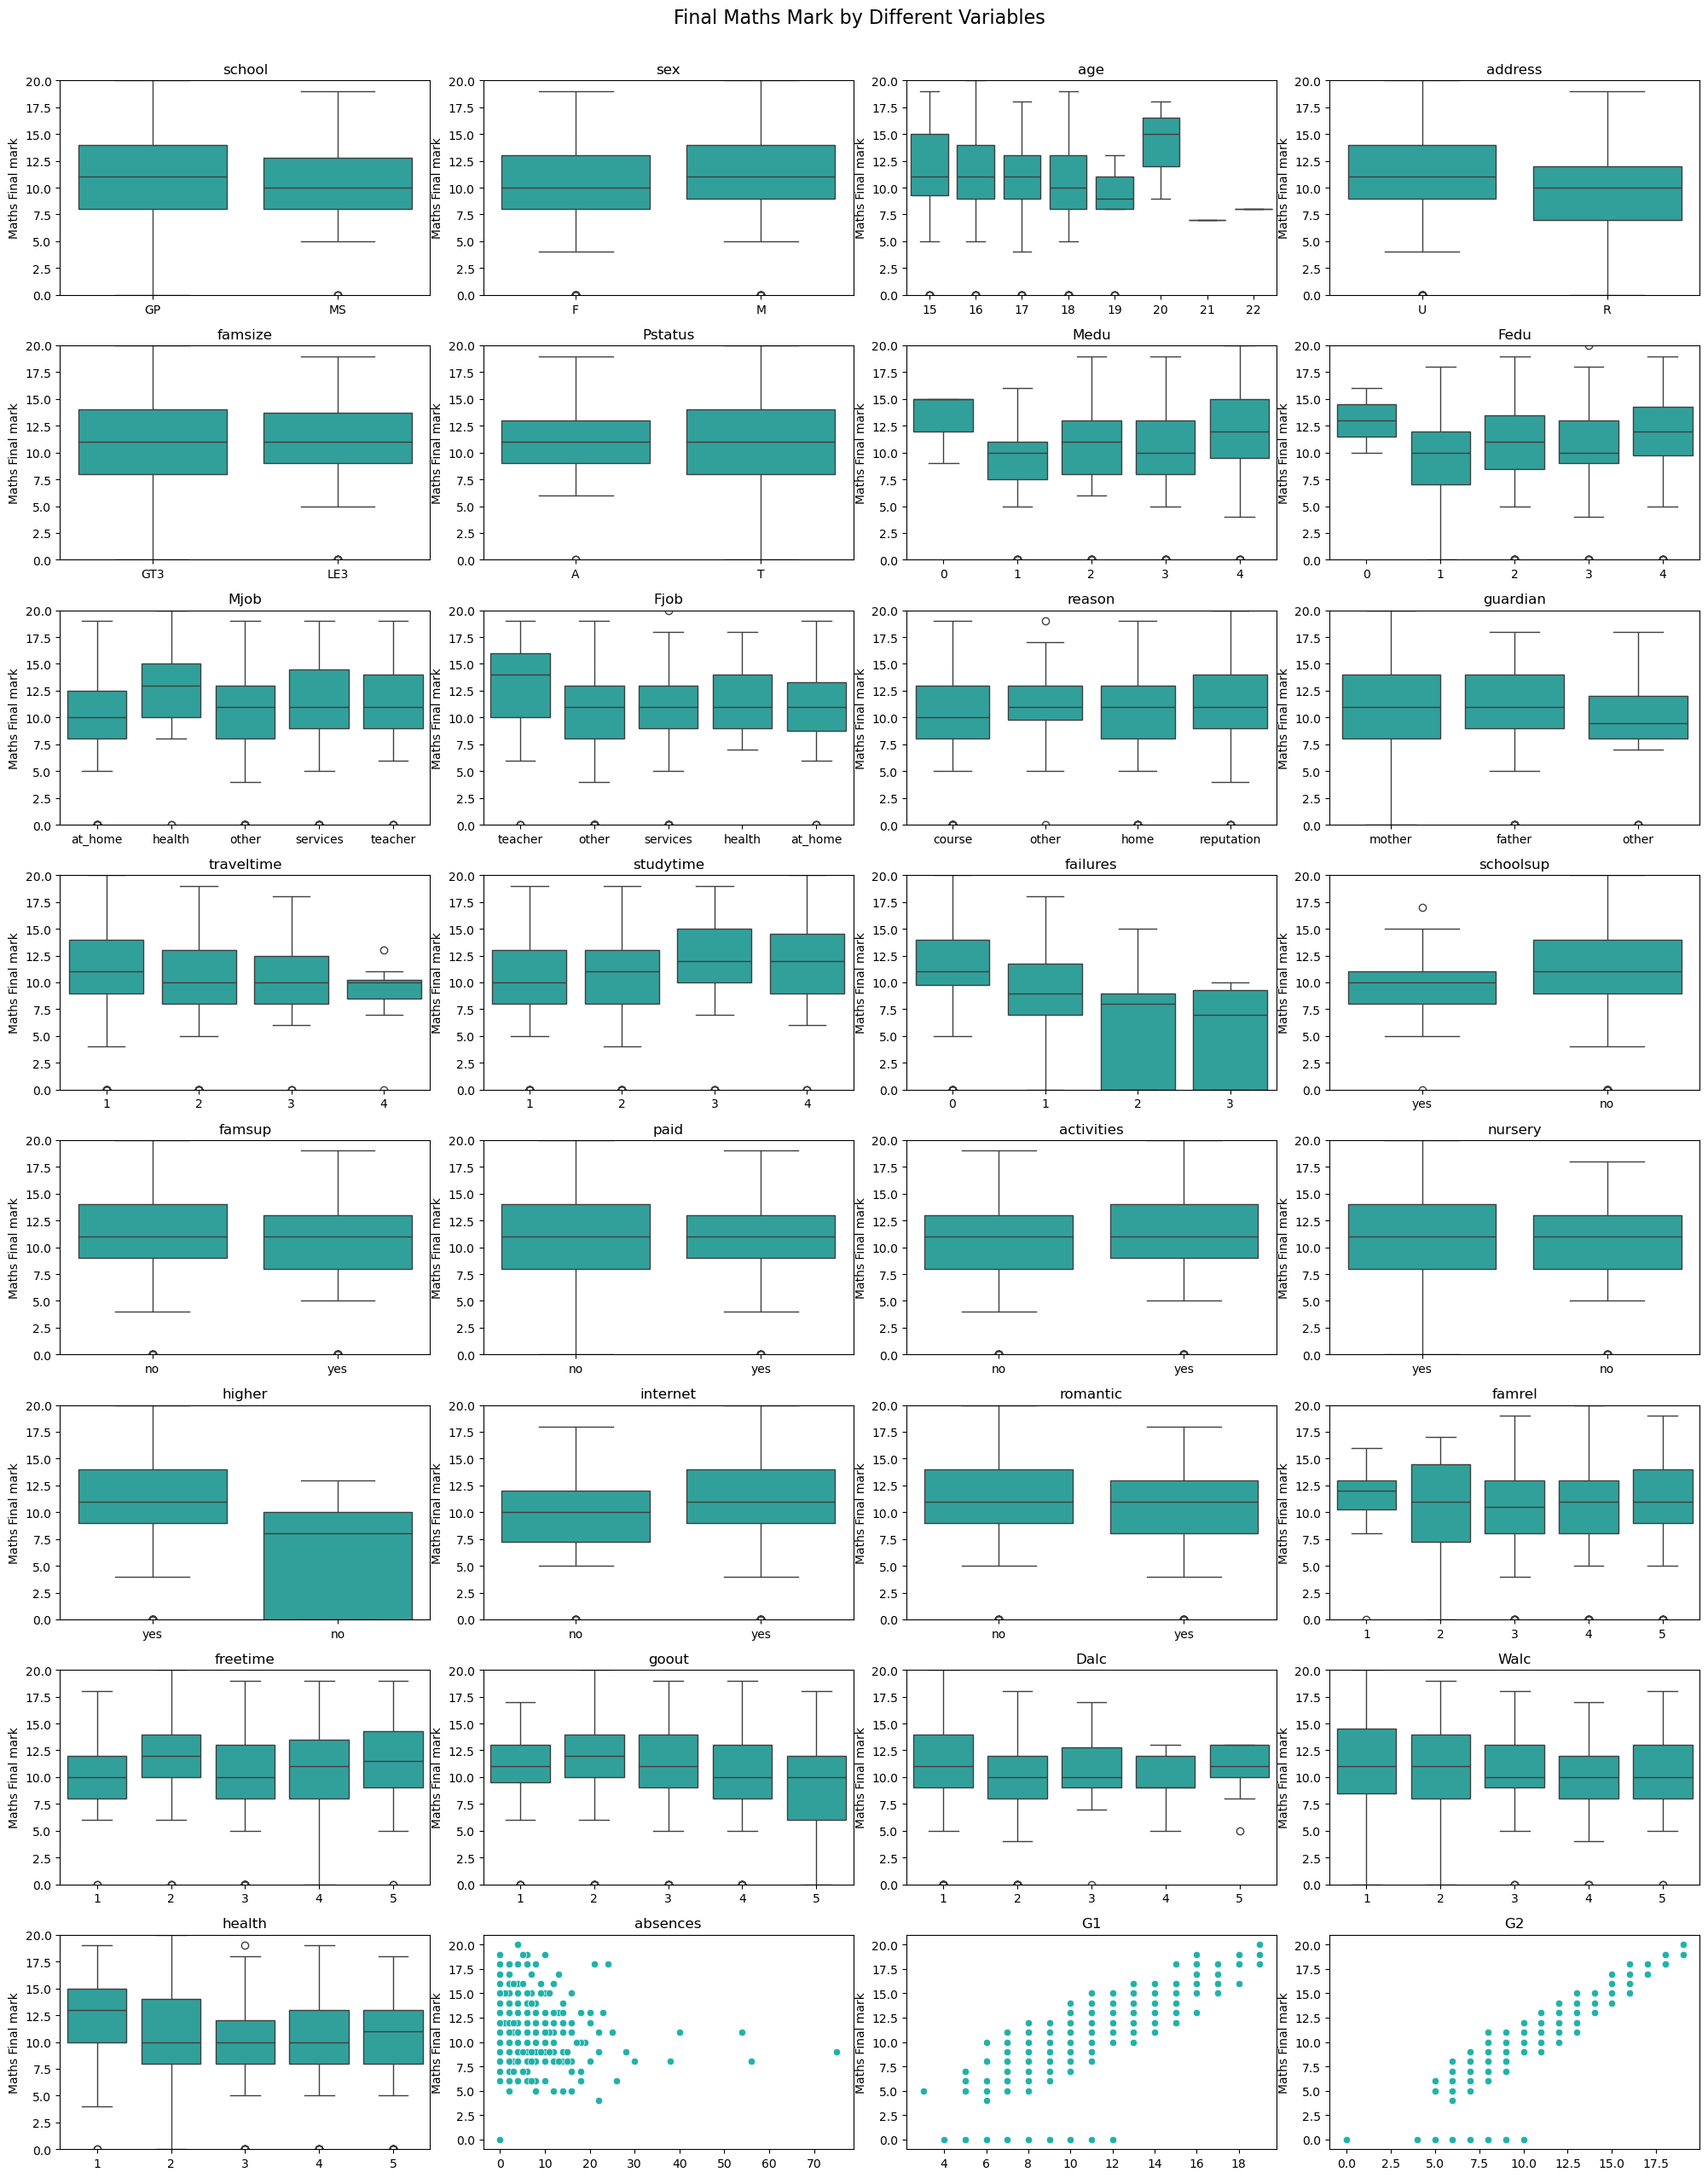

In [15]:
# Checking the distributions of final Maths marks versus all the other 32 variables with a FacetGrid chart

# Automatically get all columns except 'G3'
categories = [col for col in students.columns if col != 'G3']

# Set up the FacetGrid with 32 subplots (4 columns, 8 rows)
fig, axes = plt.subplots(
    nrows=8,  # 8 rows
    ncols=4,  # 4 columns
    figsize=(20, 25)  
)
axes = axes.flatten() # Converts the 4x8 grid into a 1D array of all subplots for easier iteration

# Loop through each category and plot a boxplot on its corresponding axis
for i, category in enumerate(categories):
    # Boxplot for the first 27 subplots
    if i < len(categories) - 3:
        sns.boxplot(
            data=students,
            x=category,
            y="G3",
            color='lightseagreen',
            ax=axes[i]
        )
        axes[i].set_title(category)
        axes[i].set_xlabel('')
        axes[i].set_ylabel('Maths Final mark')
        axes[i].set_ylim(0, 20)  # Set y-axis limits
    else:
        # Scatterplot for the last 3 subplots
        sns.scatterplot(
            data=students,
            x=category,
            y="G3",
            color='lightseagreen',
            ax=axes[i]
        )
        axes[i].set_title(category)
        axes[i].set_xlabel('')
        axes[i].set_ylabel('Maths Final mark')

# Hide any extra empty subplots if the categories don't fill the grid perfectly (not needed for this dataset)
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.suptitle('Final Maths Mark by Different Variables', fontsize=16, y=1.02)
plt.show()


### Comments:
- The data does have records for 394 high school students across the two schools. The data is clean and is not missing values.
- The following statements can be made from the initial counting:
    - 72% of students are from one of the two schools (Gabriel Pereira)
    - 89% of students are from two-parent households
    - 85% of mothers and 95% of fathers work outside of the home
    - 69% of students nominated the mother as their guardian
    - 13% of students receive additional educational support from the school
    - 61% of students receive additional educational support from their family
    - 46% of students take additional paid mathematics classes
    - 51% of students participate in extracurricular activities
    - 79% of students went to nursery school which, in Portugal is not free
    - 95% of students want to undertake higher education
    - 83% of students have access to the internet at home
    - 33% of students where in a romantic relationship
- Based on the information above, it can be assumed that the two schools and their students are in a moderately wealthy or middle-class aspirational community where academic success is highly valued. Although this can't be confirmed since family income information is not included in the data set.
- From the initial graphical exploration it seems that the variables that could be good predictors of success in Mathematics for this cohort are:
    - Living in urban areas
    - The desire of accessing higher education
    - Internet access at home
    - Increased study time
    - Not having past failures
    - Achieving good results in the first two periods of the academic year

### Further exploration

In [18]:
# Checking correlation of absences, G1, G2 and G3
corr = students.iloc[:,29:33].corr()

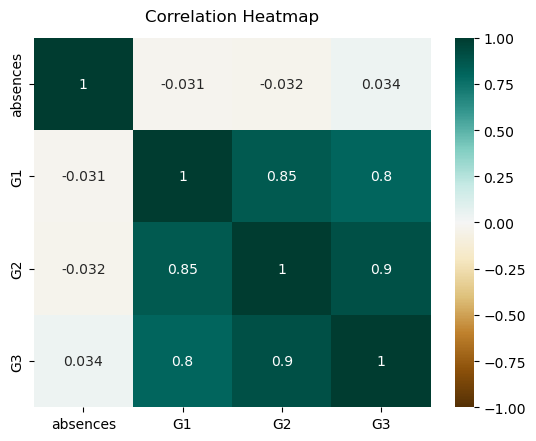

In [19]:
# Plotting a heatmap to visualize correlation of absences, G1, G2 and G3
heatmap = sns.heatmap(corr, vmin=-1, vmax=1, cmap='BrBG', annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
plt.show()

### Comment: 
    Results in the first two terms are strong predictors of final result as would be expected whilst interestingly, lack of attendance does not correlate with final results at all. This could be due to the high percentages of students with internet access and additional family support at home.

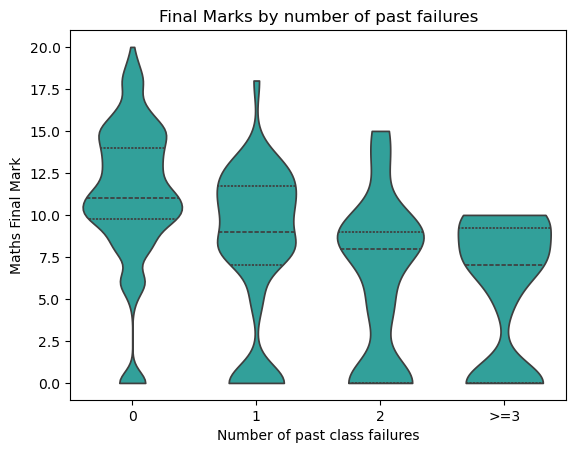

In [21]:
# Examine effect of past class failures on Maths final marks
sns.violinplot(data=students, x="failures", y="G3", inner="quartile", bw_adjust=0.5, cut=0, color='lightseagreen')
plt.title("Final Marks by number of past failures")
plt.xlabel("Number of past class failures")
plt.ylabel("Maths Final Mark")
plt.xticks(ticks=[0, 1, 2, 3], labels=["0", "1", "2", ">=3"])  
plt.show()

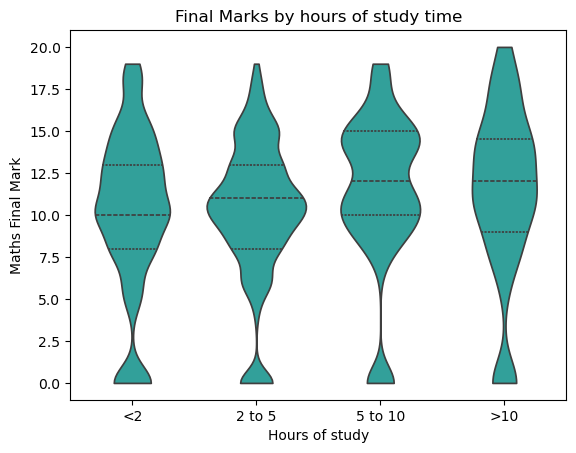

In [22]:
# Examine effect of increase study time on Maths final marks
sns.violinplot(data=students, x="studytime", y="G3", inner="quartile", bw_adjust=0.5, cut=0, color='lightseagreen')
plt.title("Final Marks by hours of study time")
plt.xlabel("Hours of study")
plt.ylabel("Maths Final Mark")
plt.xticks(ticks=[0, 1, 2, 3], labels=["<2", "2 to 5", "5 to 10", ">10"])  
plt.show()

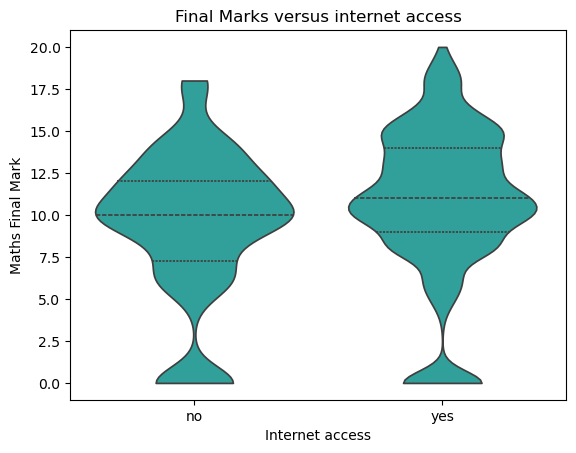

In [23]:
# Examine effect of internet access at home on Maths final marks
sns.violinplot(data=students, x="internet", y="G3", inner="quartile", bw_adjust=0.5, cut=0, color='lightseagreen')
plt.title("Final Marks versus internet access")
plt.xlabel("Internet access")
plt.ylabel("Maths Final Mark")
plt.show()

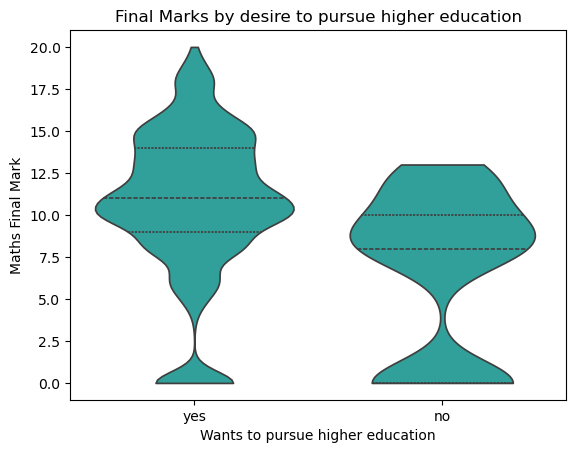

In [24]:
# Examine effect of wanting to pursue higher education on Maths final marks
sns.violinplot(data=students, x="higher", y="G3", inner="quartile", bw_adjust=0.5, cut=0, color='lightseagreen')
plt.title("Final Marks by desire to pursue higher education")
plt.xlabel("Wants to pursue higher education")
plt.ylabel("Maths Final Mark")
plt.show()

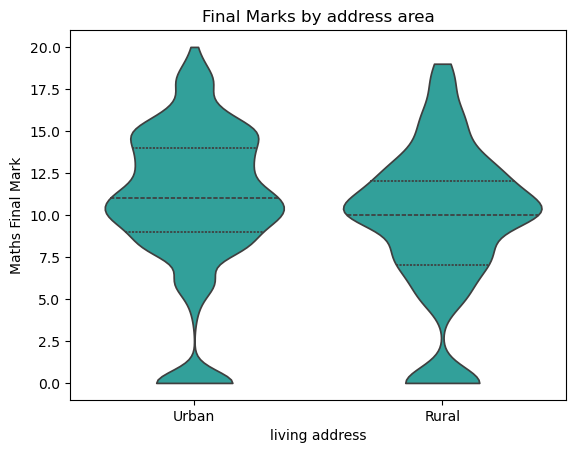

In [25]:
# Examine effect of living on urban or rural areas on Maths final marks
sns.violinplot(data=students, x="address", y="G3", inner="quartile", bw_adjust=0.5, cut=0, color='lightseagreen')
plt.title("Final Marks by address area")
plt.xlabel("living address")
plt.ylabel("Maths Final Mark")
plt.xticks(ticks=[0, 1], labels=["Urban", "Rural"]) 
plt.show()

In [26]:
students.value_counts('failures')

failures
0    312
1     50
2     17
3     16
Name: count, dtype: int64

### Comment:
Out of the five variables tested above, the ones that seem to have the biggest effect on final results are the desire of pursuing higher education and past class failures. Given that the samples for the students that want to pursue higher education are extremely uneven ( 375 who do versus 20 who don't), hypothesis testing will be conducted with past class failures (312 with no failures versus 83 with one failure or more)

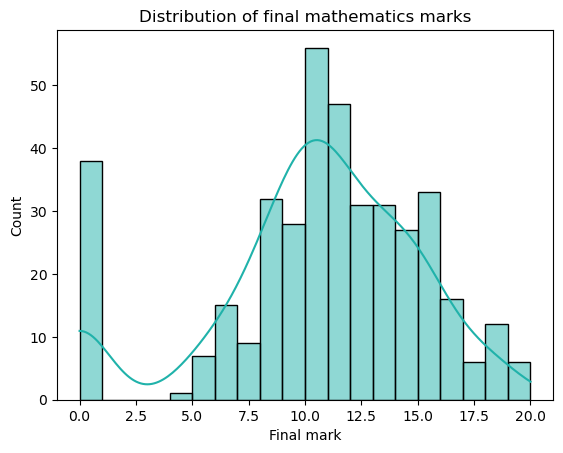

In [28]:
# Checking distribution of final mark G3
sns.histplot(data=students, x="G3", bins = 20, kde=True, color='lightseagreen')
plt.title("Distribution of final mathematics marks")
plt.xlabel("Final mark")
plt.show()

## Part 2. Hypothesis testing

<b>Question</b>: Are the mathematical final results of students who have never failed a class higher than those who have failed one or more classes?
    
We have a sample of 312 students who have never failed a class and a sample of 83 students who have failed one or more. The mean mark for both samples can be determined and the difference calculated. Since the samples are bigger than 30 and have a ratio of 3.8 to 1, one sided two sample z-test with different variances will be used. Eventhough the distribution of final marks is not perfectly normal due to the high quantity of very low marks, the z-test is still a robust option.

* <b>Null hypothesis</b>: Students without past failures don’t achieve higher final marks (difference is due to chance).
* <b>Alternative hypothesis</b>: Students without past failures score higher on final marks.
* <b>Significance level</b>: assume it to be 5% or 0.05

In [32]:
# Getting the samples from the main data as students_nofail and students_fail

students_nofail = students[students['failures']==0][['G3']]
students_fail = students[students['failures']!=0][['G3']]

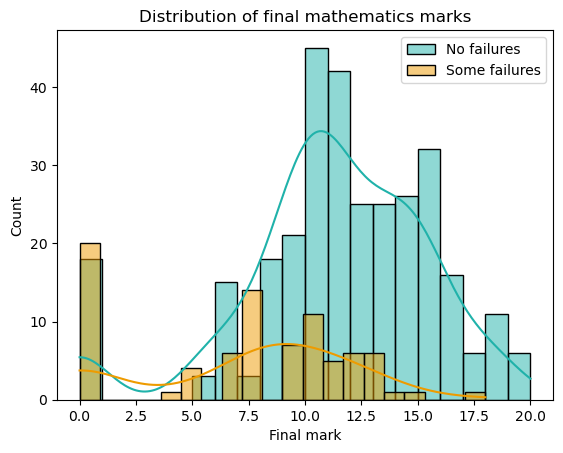

In [33]:
# Checking the distribution of the samples
# Checking distribution of final mark G3
sns.histplot(data=students_nofail, x="G3", bins = 20, label="No failures", kde=True, color= "lightseagreen")
sns.histplot(data=students_fail, x="G3", bins = 20, label="Some failures", kde=True, color='#ee9b00')
plt.legend()
plt.title("Distribution of final mathematics marks")
plt.xlabel("Final mark")
plt.show()

In [34]:
# Checking the mean marks of both samples
print(f'Mean final mark of students who have never failed: {students_fail['G3'].mean():.2f}')
print(f'Mean final mark of students who have failed once or more: {students_nofail['G3'].mean():.2f}')

Mean final mark of students who have never failed: 7.27
Mean final mark of students who have failed once or more: 11.25


####  Calculation of the z-statistic is performed using this formula:
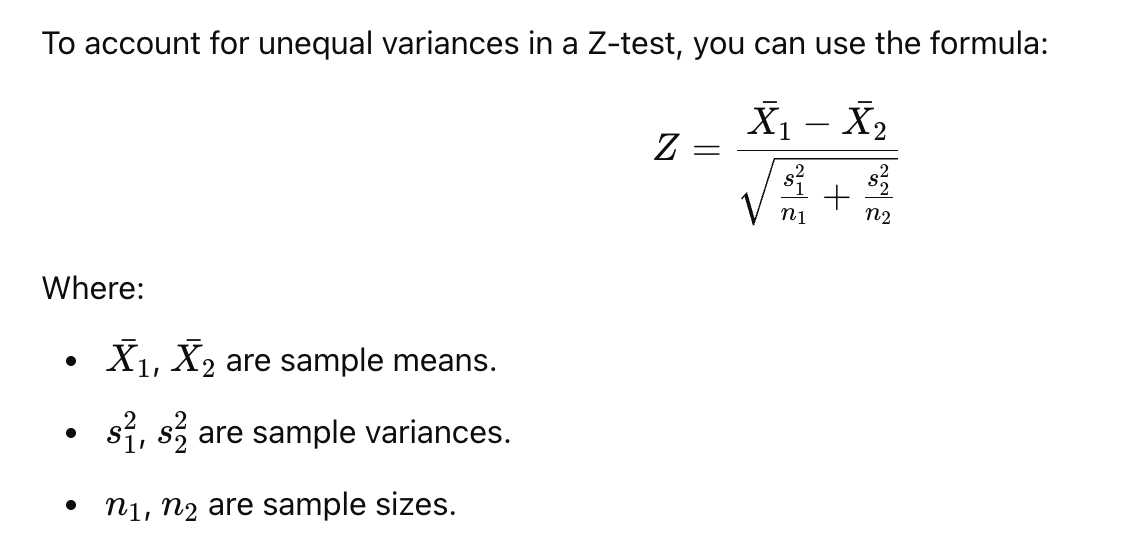

In [36]:
# on sided two sample Z-test with different variances
from scipy.stats import norm

# Calculate statistics
mean1, mean2 = students_nofail['G3'].mean(), students_fail['G3'].mean()
std1, std2 = students_nofail['G3'].std(), students_fail['G3'].std()
n1, n2 = len(students_nofail), len(students_fail)

# Z-statistic for unequal variances
z_stat = (mean1 - mean2) / np.sqrt((std1**2 / n1) + (std2**2 / n2))

# One-sided p-value (right tail)
p_value = norm.sf(z_stat)

print(f"Z-statistic: {z_stat:.4f}, p-value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("Significant difference in the expected direction!")
else:
    print("No significant difference in the expected direction.")

Z-statistic: 7.0156, p-value: 0.0000
Significant difference in the expected direction!


### Conclusion: 
The results provide strong statistical evidence to reject the null hypothesis in favour of our alternative hypothesis. Students who have not failed a class tend to achieve significantly higher final marks than those who have failed in the past.